In [3]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the dataset from kaggle
df = pd.read_csv("National Universities Rankings.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 231 non-null    int64 
 1   Name                  231 non-null    object
 2   Location              231 non-null    object
 3   Rank                  231 non-null    int64 
 4   Description           231 non-null    object
 5   Tuition and fees      231 non-null    object
 6   In-state              133 non-null    object
 7   Undergrad Enrollment  231 non-null    object
dtypes: int64(2), object(6)
memory usage: 14.6+ KB


In [6]:
# Drop index column
df.drop(columns="index", inplace=True)

# Convert currency to float
df[df.columns[4:]] = df[df.columns[4:]].replace('[\$,]', '', regex=True).astype(float)

Find a correlation between rank and undergrad enrollment

In [7]:
rank_grp = df.groupby("Rank", as_index=False)["Undergrad Enrollment"].sum()

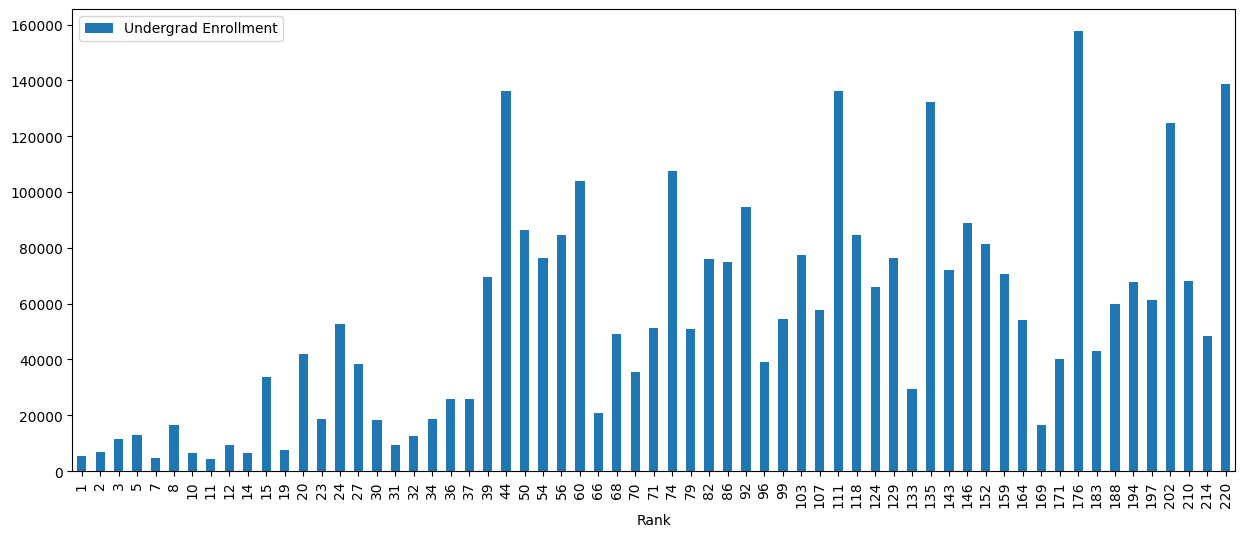

In [8]:
rank_grp.plot(x="Rank", y="Undergrad Enrollment", kind="bar", figsize=(15, 6))
plt.show()

Find a correlation between location and undergrad enrollment

In [180]:
df["State"] = df["Location"].str.split(",", expand=True).drop(columns=0).squeeze()

In [186]:
loc_grp = df.groupby("State", as_index=False)["Undergrad Enrollment"].sum()

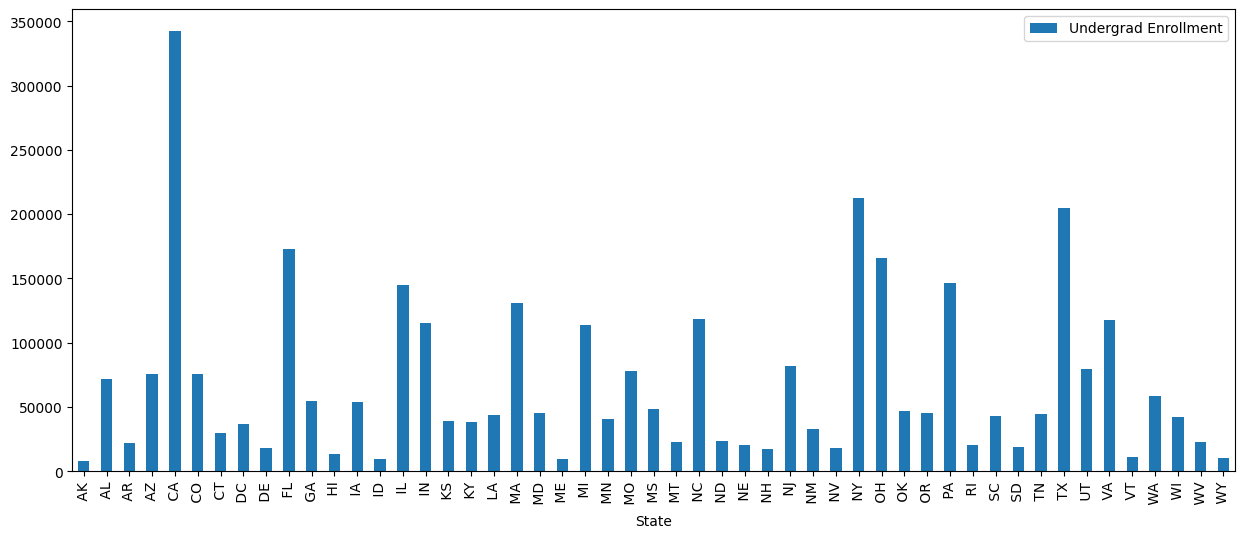

In [187]:
loc_grp.plot(x="State", y="Undergrad Enrollment", kind="bar", figsize=(15, 6))
plt.show()